In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos libreriras, leemos archivo CSV y sacamos la primera informacion del dataframe con funciones info, head, describe y shape

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [264]:
bmw = pd.read_csv("/content/drive/MyDrive/bmw_pricing_v2 2.csv")

Analizamos duplicados. 

In [59]:
col = bmw.columns
print('Number of columns :', len(col))

Number of columns : 19


In [267]:
count = bmw.isnull().sum().sum()
print('Number of NaN values present:' +str(count))

Number of NaN values present:62


In [4]:
bmw.duplicated().sum()

0

In [6]:
bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [9]:
bmw.isnull().sum()

modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [60]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4842
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4809 non-null   object 
 1   km                           4809 non-null   float64
 2   potencia                     4809 non-null   float64
 3   tipo_gasolina                4809 non-null   object 
 4   color                        4809 non-null   object 
 5   tipo_coche                   4809 non-null   object 
 6   volante_regulable            4809 non-null   object 
 7   aire_acondicionado           4809 non-null   object 
 8   camara_trasera               4809 non-null   object 
 9   asientos_traseros_plegables  4809 non-null   object 
 10  elevalunas_electrico         4809 non-null   object 
 11  bluetooth                    4809 non-null   object 
 12  gps                          4809 non-null   bool   
 13  alerta_lim_velocid

In [5]:
bmw[bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [10]:
bmw.isnull().sum()/len(bmw)*100

modelo                         0.061945
km                             0.041297
potencia                       0.020648
fecha_registro                 0.020648
tipo_gasolina                  0.103242
color                          0.247780
tipo_coche                     0.185835
volante_regulable              0.082593
aire_acondicionado             0.041297
camara_trasera                 0.041297
asientos_traseros_plegables    0.082593
elevalunas_electrico           0.041297
bluetooth                      0.082593
gps                            0.000000
alerta_lim_velocidad           0.041297
precio                         0.123890
fecha_venta                    0.020648
dtype: float64

No hay duplicados en el dataframe

Analizamos los nulos

In [7]:
bmw["marca"].value_counts()


BMW    4841
Name: marca, dtype: int64

In [8]:
del(bmw["marca"])

Decidimos quitar la columna de marca, ya que todos los datos son iguales.

In [14]:
bmw[bmw['color'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [ ]:
bmw[bmw['tipo_coche'].isnull()]

In [16]:
bmw["color"].fillna('sin color', inplace=True)

In [22]:
bmw["tipo_coche"].fillna('sin especificar', inplace=True)

In [23]:
bmw["tipo_gasolina"].fillna('sin especificar', inplace=True)

In [25]:
bmw.dropna(inplace=True)

In [26]:
bmw.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

En las categoricas, sustituyo en las variables con mayor frequencia de nulos una nueva etiqueta. En las demás, elimino todos los nulos

Cambiamos el dtype de fecha_registro y fecha_venta, de object a datatime

In [27]:
lista_fechas=["fecha_registro","fecha_venta"]

In [28]:
for i in lista_fechas:
  bmw[i]=pd.to_datetime(bmw[i])

In [29]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4809 non-null   object        
 1   km                           4809 non-null   float64       
 2   potencia                     4809 non-null   float64       
 3   fecha_registro               4809 non-null   datetime64[ns]
 4   tipo_gasolina                4809 non-null   object        
 5   color                        4809 non-null   object        
 6   tipo_coche                   4809 non-null   object        
 7   volante_regulable            4809 non-null   object        
 8   aire_acondicionado           4809 non-null   object        
 9   camara_trasera               4809 non-null   object        
 10  asientos_traseros_plegables  4809 non-null   object        
 11  elevalunas_electrico         4809 non-null 

Separamos los valores de los datos de fechas en día, mes año y nombre día.

In [30]:
for col in ['fecha_registro', 'fecha_venta']:
        bmw[col + '_NOMBREDIA'] = bmw[col].dt.day_name()
        bmw[col + '_DIA'] = bmw[col].dt.day
        bmw[col + '_MES'] = bmw[col].dt.month
        bmw[col + '_AÑO'] = bmw[col].dt.year
    

bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta,fecha_registro_NOMBREDIA,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,11300.0,2018-01-01,Wednesday,1,2,2012,Monday,1,1,2018
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,69700.0,2018-02-01,Friday,1,4,2016,Thursday,1,2,2018
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,10200.0,2018-02-01,Sunday,1,4,2012,Thursday,1,2,2018
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,25100.0,2018-02-01,Tuesday,1,7,2014,Thursday,1,2,2018
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,33400.0,2018-04-01,Monday,1,12,2014,Sunday,1,4,2018


Eliminamos fecha registro y fecha venta proque ya tenemos esos datos desglosados 

In [31]:
del(bmw["fecha_registro"])
del(bmw["fecha_venta"])

Separamos las variables en listas categóricas, numéricas y booleanas para simplificar el análisis. Dejamos la variable precio afuera porque la definimos como nuestro “target”:

In [32]:
target = ["precio"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if ( (dataset[i].dtype.kind=="f") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())!=2):
      lista_numericas.append(i)
    elif ( (dataset[i].dtype.kind=="b") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())==2):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=="O") & (i not in target):
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [33]:
lista_numericas, lista_boolean, lista_categoricas=obtener_lista_variables(bmw)

In [34]:
lista_numericas

['km',
 'potencia',
 'fecha_registro_DIA',
 'fecha_registro_MES',
 'fecha_registro_AÑO',
 'fecha_venta_DIA',
 'fecha_venta_MES',
 'fecha_venta_AÑO']

In [35]:
lista_boolean

['gps']

In [36]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_registro_NOMBREDIA',
 'fecha_venta_NOMBREDIA']

Analizaremos las variables numericas obtenidas en lista_numericas y el precio

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb68b8ccd0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb65fe6250>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb66043040>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb66011ac0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb65f48a60>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb65e9b2e0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb65e62af0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb65e37370>]]


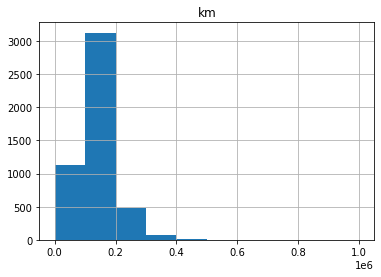

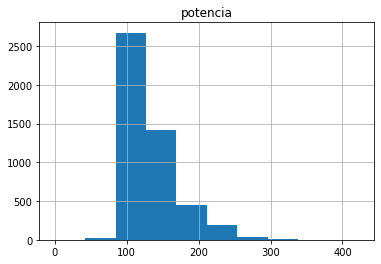

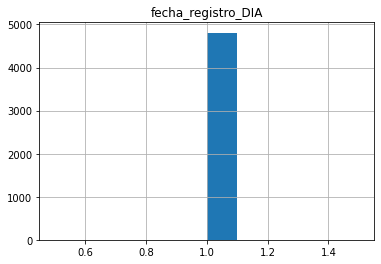

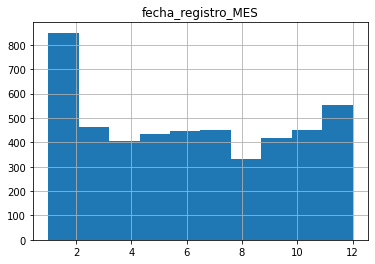

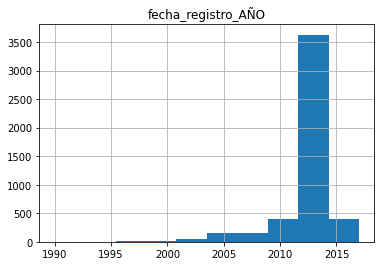

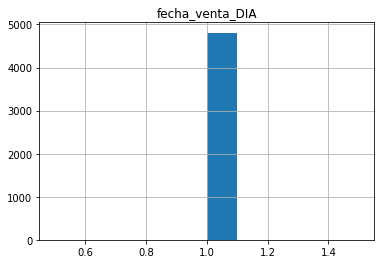

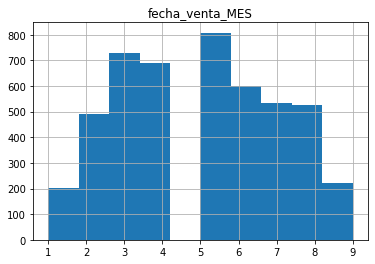

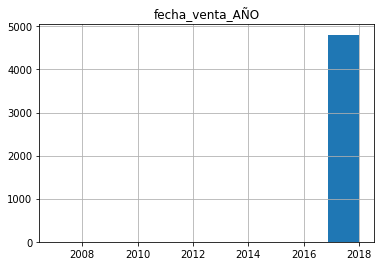

In [37]:
for i in lista_numericas:
  print(bmw.hist(i)) 

A simple vista parece que tres columnas solo hay un valor, pero decidimos comrpovarlo

In [50]:
num_bmw = bmw[bmw.columns[bmw.columns.isin(lista_numericas)]]

In [51]:
num_bmw.loc[:, num_bmw.nunique() ==1]

,fecha_registro_DIA,fecha_venta_DIA
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
4838,1,1
4839,1,1
4840,1,1
4841,1,1


Vemos que solo hay realmente dos columnas con un valor, aún así fecha año solo hay dos nievles, por lo tanto no creemos que sea muy determinante. Por otro lado, decidimos eliminar fecha_venta_mes ya que no presneta valores entre el més de abril a mayo.

In [53]:
del(bmw["fecha_venta_DIA"])
del(bmw["fecha_venta_AÑO"])
del(bmw["fecha_registro_DIA"])
del(bmw["fecha_registro_MES"])

Ahora analizamos las demás columns numéricas. Emepzamos por km

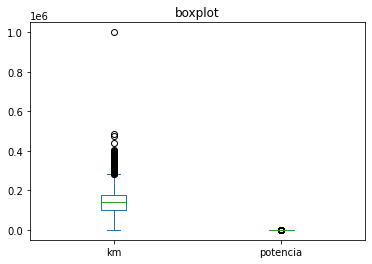

In [69]:
ax = bmw[['km', 'potencia']].plot(kind='box', title='boxplot')

plt.show()

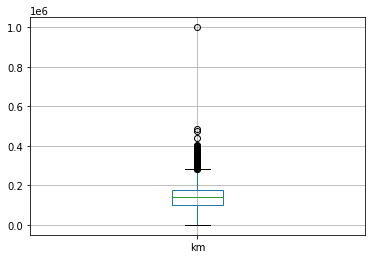

In [70]:
bmw.boxplot('km')

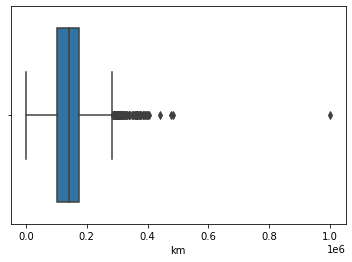

In [71]:
sns.boxplot(x="km",data=bmw)

Hay un outlier muy alejado de los otros, así que lo eliminamos ya que aunque sea posible, no es representativo y afecta a la distribución del modelo

In [74]:
bmw[bmw['km']>1e6]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
3732,118,1000376.0,90.0,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,Tuesday,2005,Friday,6


In [76]:
bmw.drop(bmw[bmw["km"]>1e6].index,inplace=True)

In [ ]:
bmw["km"].describe()

count    4.783000e+03
mean     1.408035e+05
std      6.021348e+04
min     -6.400000e+01
25%      1.024720e+05
50%      1.407440e+05
75%      1.751730e+05
max      1.000376e+06
Name: km, dtype: float64

Al ver que hay minimo negativo, eliminamos todos los valores con km inferiores a 0. En este caso solo hay uno.

In [77]:
bmw[bmw['km']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,Wednesday,2017,Sunday,4


Antes hemos analizado si hay muha diferencia entre eliminar el valor o sustituirlo por la media:

In [117]:
bmw_mean = bmw.copy()

In [78]:
bmw_mean['km']= np.where(bmw_mean['km']<0,bmw_mean["km"].mean(),bmw_mean['km'])

In [118]:
bmwa = bmw.copy()

In [80]:
bmwa.drop(bmwa[bmwa["km"]<0].index,inplace=True)

Elimino la fila con el valor negativo de Km

In [81]:
print(bmw_mean['km'].mean())
print(bmwa['km'].mean())
print(bmw['km'].mean())

140891.91632596415
140713.12398585398
140683.84421797004


En este caso, altera más poner la media que eliminar el valor, aunque la diferencia no es para nada significativa 

In [ ]:
a = bmw['km']
b = bmw_mean['km']
c = bmwa['km']

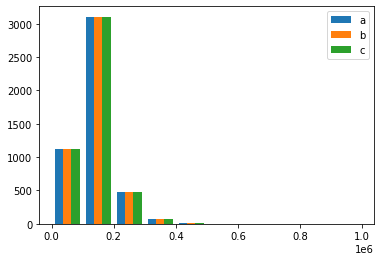

In [ ]:
plt.hist([a, b,c], bins=10, label=['a', 'b','c'])
plt.legend(loc='upper right')
plt.show()

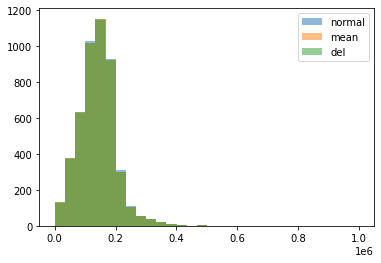

In [ ]:
import numpy
from matplotlib import pyplot



pyplot.hist(bmw['km'], bins = 30, alpha=0.5, label='normal')
pyplot.hist(bmw_mean['km'], bins = 30, alpha=0.5, label='mean')
pyplot.hist(bmwa['km'],bins =30, alpha=0.5, label='del')
pyplot.legend(loc='upper right')
pyplot.show()

When we plot the histograms we can't see either much difference. We decide to eliminate the negative value

In [87]:
bmw.drop(bmw[bmw["km"]<0].index,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb64b2f940>]],
      dtype=object)

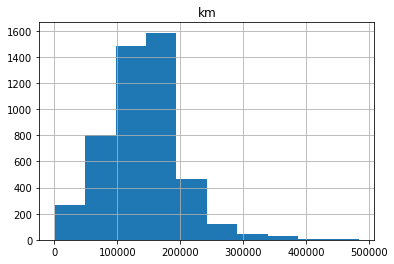

In [137]:
bmw.hist('km')

La variable km ya presenta una distribución normal así que tampoco sería necesaria hacer un logaritmo. Aún así lo hacemos para observar como cambia la distribución.

In [138]:
bmw["log_km"]=np.log10(bmw["km"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb64a3e130>]],
      dtype=object)

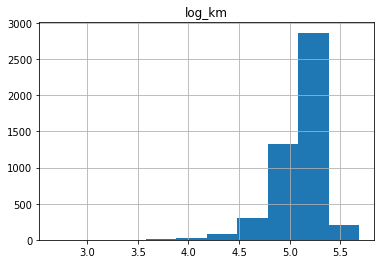

In [139]:
bmw.hist('log_km')

In [140]:
from scipy.stats import kurtosis
print(kurtosis(bmw['km'], axis=0, bias=True))
print(kurtosis(bmw['log_km'], axis=0, bias=True))
from scipy.stats import skew
print(skew(bmw['km'], axis=0, bias=True))
print(skew(bmw['log_km'], axis=0, bias=True))


1.7206299289094993
10.455021606146776
0.5854112309896466
-2.132115959194436


En este caso, vemos que es mejor mantener la variable km sin el logaritmo

In [141]:
del(bmw['log_km'])

Ahora analizamos la columna potencia

In [ ]:
bmw["potencia"].describe()

count    4782.000000
mean      129.063781
std        39.056006
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

Vemos que hay potencias de 0, la cual cosa no tiene sentido. Encontramos 3 potencias inferiores a 50.

In [ ]:
bmw[bmw["potencia"]<50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
1796,i3,152328.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,Saturday,2014,Sunday,4
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,Saturday,2014,Thursday,3
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,Wednesday,2014,Thursday,3


Elimino los coches con potencia menor a 50

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa9300a60>]],
      dtype=object)

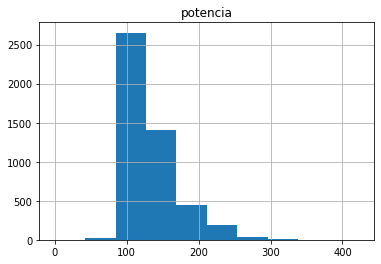

In [ ]:
bmw.hist("potencia")

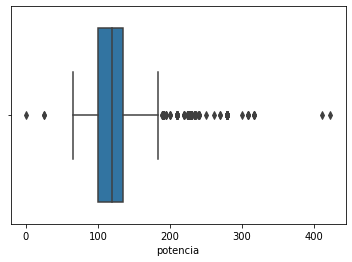

In [93]:
sns.boxplot(x="potencia",data=bmw)

In [88]:
bmw1=bmw.copy()

In [119]:
bmwa.drop(bmwa[bmwa["potencia"]>350].index,inplace=True)

In [120]:
bmwa.drop(bmwa[bmwa["potencia"]<50].index,inplace=True)

In [121]:
bmw_mean['potencia']= np.where(bmw_mean['potencia']>350,bmw_mean["potencia"].mean(),bmw_mean['potencia'])

In [122]:
bmw_mean['potencia']= np.where(bmw_mean['potencia']<50,bmw_mean["potencia"].mean(),bmw_mean['potencia'])

In [123]:
import matplotlib.pyplot as plt


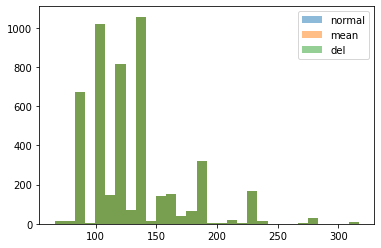

In [124]:
plt.hist(bmw['potencia'], bins = 30, alpha=0.5, label='normal')
plt.hist(bmw_mean['potencia'], bins = 30, alpha=0.5, label='mean')
plt.hist(bmwa['potencia'],bins =30, alpha=0.5, label='del')
plt.legend(loc='upper right')
plt.show()

In [127]:

  print('La media es:',bmw['potencia'].mean())
  print('La media con del es:',bmwa['potencia'].mean())
  print('La media con cambio de media es:',bmw_mean['potencia'].mean())


La media es: 128.93167221637503
La media con del es: 128.93167221637503
La media con cambio de media es: 128.93167221637503


En este caso no tiene mucha importancia si decidimos eliminar los outliers o cambiarlos por la media. Para no reducir más 'poblacion' los sustituimos por la media.

In [128]:
bmw['potencia']= np.where(bmw['potencia']>350,bmw["potencia"].mean(),bmw['potencia'])
bmw['potencia']= np.where(bmw['potencia']<50,bmw["potencia"].mean(),bmw['potencia'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb64b5d940>]],
      dtype=object)

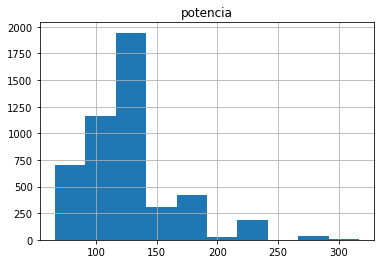

In [129]:
bmw.hist("potencia")

In [130]:
bmw["log_potencia"]=np.log10(bmw["potencia"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb655f84c0>]],
      dtype=object)

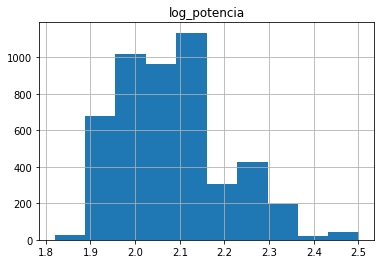

In [131]:
bmw.hist('log_potencia')

Transformamos a logaritmica potencia ya que parece tener una distribucion exponencial, la normalizamos

Al anlizar la simetria y curtosis,vemos que al aplicar el logaritmo obtenemos valores muy cercanos a 0. Nos quedamos con el logaritmo

In [133]:
from scipy.stats import kurtosis
print(kurtosis(bmw['potencia'], axis=0, bias=True))
print(kurtosis(bmw['log_potencia'], axis=0, bias=True))



2.386231497307892
0.16457271791125594


In [136]:
from scipy.stats import skew
print(skew(bmw['potencia'], axis=0, bias=True))
print(skew(bmw['log_potencia'], axis=0, bias=True))


1.4145185094728072
0.6272113611099992


Eliminamos la columna Fecha registro dia, fecha venta dia, fecha venta año y fecha venta mes por tener periodos donde no tenemos ningun dato. 

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 0 to 4841
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4779 non-null   object 
 1   km                           4779 non-null   float64
 2   potencia                     4779 non-null   float64
 3   tipo_gasolina                4779 non-null   object 
 4   color                        4779 non-null   object 
 5   tipo_coche                   4779 non-null   object 
 6   volante_regulable            4779 non-null   object 
 7   aire_acondicionado           4779 non-null   object 
 8   camara_trasera               4779 non-null   object 
 9   asientos_traseros_plegables  4779 non-null   object 
 10  elevalunas_electrico         4779 non-null   object 
 11  bluetooth                    4779 non-null   object 
 12  gps                          4779 non-null   bool   
 13  alerta_lim_velocid

In [144]:
del(bmw['potencia'])

In [145]:
corr = bmw.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,gps,precio,fecha_registro_AÑO,fecha_venta_MES,log_potencia
km,1.000000,0.157684,-0.412608,-0.508252,-0.003241,-0.024758
gps,0.157684,1.000000,-0.007683,-0.071870,0.061889,-0.008881
precio,-0.412608,-0.007683,1.000000,0.449710,0.014427,0.614448
fecha_registro_AÑO,-0.508252,-0.071870,0.449710,1.000000,-0.051336,0.083505
fecha_venta_MES,-0.003241,0.061889,0.014427,-0.051336,1.000000,-0.041302
log_potencia,-0.024758,-0.008881,0.614448,0.083505,-0.041302,1.000000


No se observa correlacion entre las variables numericas. 

Analizaremos las variables categoricas

ANALISIS CATEGORICAS

In [146]:
for i in lista_categoricas:
  print(bmw[i].value_counts()) 

320                743
520                627
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
Diesel                5
electro               3
Name: tipo_gasolina, dtype: int64
black        1617
grey         1166
blue          701
white         531
brown         340
silver        324
red            51
beige          41
green          18
sin color      12
orange          6
Name: color, dtype: int64
estate             1580
sedan              1166
suv                1056
hatchback           699
subcompact          112
coupe                97
convertible          47
van                  41
sin especificar       9
Name: tipo_coche, dtype: int64
True     2644
False    2163
Name: volante_regulable, dtype:

Decidimos manterner igual los datos de todas las variables, a exepcion de tipo de gasolina que unificamos Diesel y diesel y eliminamos aquellas filas con valores tipo_gasolina = False. Asumimos que es un error.

In [147]:
bmw["tipo_gasolina"]=np.where(bmw["tipo_gasolina"]=="Diesel",bmw["tipo_gasolina"]=="diesel",bmw["tipo_gasolina"])

In [148]:
bmw["tipo_gasolina"].value_counts()

diesel             4595
petrol              191
hybrid_petrol         8
sin especificar       5
False                 5
electro               3
Name: tipo_gasolina, dtype: int64

In [223]:
bmw['modelo'].value_counts()

320                743
520                627
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
target = ["modelo"]
def cambio(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if ( (dataset[i].endswith=="f") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())!=2):
      lista_numericas.append(i)
    elif ( (dataset[i].dtype.kind=="b") | (dataset[i].dtype.kind=="i"))  & (i not in target) & (len(dataset[i].unique())==2):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=="O") & (i not in target):
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [172]:
da[da['modelo'].str.startswith('M')].groupby('M')['modelo']

KeyError: ignored

In [214]:
for i in lista_l
bmw['modelo'].str.split

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [218]:
new = a[a["modelo"].str.isdigit()]

In [220]:
num_l = new['modelo']

In [221]:
new['modelo']

0       118
2       320
3       420
4       425
5       335
       ... 
4801    218
4803    216
4806    218
4812    218
4842    525
Name: modelo, Length: 3382, dtype: object

In [242]:
a = bmw.copy()

In [247]:
a.modelo.str.split()[1]

['M4']

In [260]:
 b= a['modelo'].str.split(pat = ' ', expand = True)[2]



ValueError: ignored

In [258]:
b


0         None
1         None
2         None
3         None
4         None
         ...  
4838    Tourer
4839    Tourer
4840    Tourer
4841    Tourer
4842      None
Name: 2, Length: 4807, dtype: object

In [248]:
a['modelo']

0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
4842                  525
Name: modelo, Length: 4807, dtype: object

In [237]:
a['modelo'].str.split(", ").str[-1]


0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
4842                  525
Name: modelo, Length: 4807, dtype: object

In [222]:
a["modelo"]=np.where(a["modelo"]==num_l,a["modelo"]=="num",a["modelo"])

ValueError: ignored

In [190]:
la["modelo"]=np.where(la["modelo"].str.endswith('Coupé'),la["modelo"]=="Gran_Coupé",la["modelo"])

In [191]:
la["modelo"]=np.where(la["modelo"].str.endswith('Turismo'),la["modelo"]=="Gran_Turismo",la["modelo"])

In [204]:
le["modelo"]=np.where(le["modelo"].str.endswith('Tourer')==True,le["modelo"]=="Modelo_Tourer",le["modelo"])

In [202]:
le["modelo"]=np.where(le["modelo"].str.isdigit()==True,le["modelo"]=="modelo_numerico",le["modelo"])

In [ ]:
l['modelo']=np.where(le["modelo"]=='X1',le["modelo"]=="modelo_numerico",le["modelo"])

In [209]:
nombres = l.modelo.unique()
data = {}

for nombre in nombres:
  if data[nombre].str.startswith('M')l["modelo"]=="modelo_M",l["modelo"])
  l[l.modelo==nombre]

{'118':      modelo        km tipo_gasolina   color   tipo_coche volante_regulable  \
 0       118  140411.0        diesel   black  convertible              True   
 7       118  115560.0        petrol   white  convertible              True   
 30      118  195114.0        diesel     red  convertible              True   
 49      118  147180.0        diesel   black        coupe              True   
 136     118  140464.0        diesel    blue        coupe             False   
 ...     ...       ...           ...     ...          ...               ...   
 3719    118  170287.0        diesel  silver   subcompact             False   
 3721    118   54093.0        diesel   black   subcompact             False   
 3723    118  186916.0        diesel    grey   subcompact             False   
 3725    118  119724.0        diesel    grey   subcompact             False   
 3737    118  169560.0        petrol    grey   subcompact             False   
 
      aire_acondicionado camara_trasera asi

In [208]:
l['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [197]:
la['modelo'].unique()

array([False, 'Z4', 'i8', 'i3', 'ActiveHybrid 5'], dtype=object)

In [169]:
da[da['modelo'].str.startswith('M')]

,modelo,km,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES,log_potencia
1,M4,13929.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,Friday,2016,Thursday,2,2.501059
41,M3,270907.0,petrol,black,convertible,True,False,False,False,False,True,True,False,12100.0,Thursday,1996,Wednesday,8,2.372912
57,M235,34082.0,petrol,grey,coupe,False,True,True,False,True,True,True,True,30200.0,Sunday,2015,Monday,1,2.380211
67,M3,29925.0,petrol,silver,coupe,True,True,False,False,True,True,True,True,47000.0,Saturday,2012,Sunday,4,2.489958
72,M4,69410.0,petrol,white,coupe,True,True,False,False,False,True,True,True,53600.0,Sunday,2015,Thursday,3,2.501059
73,M3,170550.0,petrol,grey,coupe,True,True,False,False,True,False,True,True,28000.0,Tuesday,2011,Thursday,3,2.489958
84,M235,69736.0,petrol,grey,coupe,True,True,True,False,True,True,True,False,30000.0,Saturday,2014,Tuesday,5,2.380211
93,M3,99283.0,petrol,silver,coupe,False,False,False,False,True,False,True,True,28600.0,Monday,2008,Sunday,4,2.489958
102,M235,37619.0,petrol,black,coupe,True,False,False,False,True,True,True,True,27700.0,Thursday,2014,Tuesday,5,2.380211
139,M3,169970.0,petrol,grey,coupe,True,True,False,False,True,False,True,True,35700.0,Tuesday,2011,Wednesday,8,2.489958


In [158]:
da = bmw.copy()

In [ ]:
da = df.groupby(df['modelo'].str[0])['val'].sum().reset_index(name='new')
print (df1)

In [ ]:
bmw[(bmw["tipo_gasolina"]=="electro") | (bmw["tipo_gasolina"]=="hybrid_petrol")]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
90,BMW,i8,12402.0,170.000000,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,Friday,2016,Sunday,4
1796,BMW,i3,152328.0,129.088684,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,Saturday,2014,Sunday,4
1895,BMW,i3,26542.0,75.000000,electro,grey,hatchback,False,True,False,False,False,False,True,True,20900.0,Saturday,2014,Thursday,2
1925,BMW,i3,152470.0,129.088684,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,Saturday,2014,Thursday,3
2317,BMW,i3,78740.0,75.000000,electro,grey,hatchback,True,True,False,False,False,False,True,False,20800.0,Tuesday,2014,Sunday,7
2363,BMW,i3,46359.0,125.000000,electro,white,hatchback,True,True,False,False,False,False,True,True,21200.0,Wednesday,2014,Wednesday,8
2925,BMW,ActiveHybrid 5,94374.0,225.000000,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,Tuesday,2012,Sunday,4
3690,BMW,i3,6572.0,75.000000,hybrid_petrol,black,subcompact,True,True,True,False,False,False,True,True,28000.0,Sunday,2015,Thursday,3
4018,BMW,X5,33639.0,180.000000,hybrid_petrol,grey,suv,True,True,False,True,True,False,True,True,52200.0,Wednesday,2016,Thursday,3
4214,BMW,X5,129317.0,230.000000,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,Tuesday,2015,Sunday,4


In [ ]:
bmw.drop(bmw[bmw["tipo_gasolina"]==False].index,inplace=True)

In [ ]:
bmw["tipo_gasolina"].value_counts()

diesel           4578
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

Analizamos la variable Precio

In [ ]:
bmw["precio"].describe()

count      4778.000000
mean      15876.935956
std        9236.361533
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18700.000000
max      178500.000000
Name: precio, dtype: float64

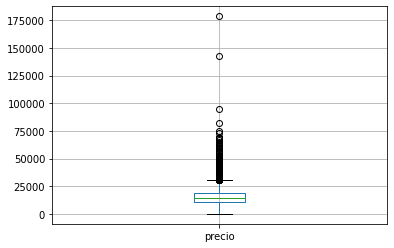

In [ ]:
bmw.boxplot('precio')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


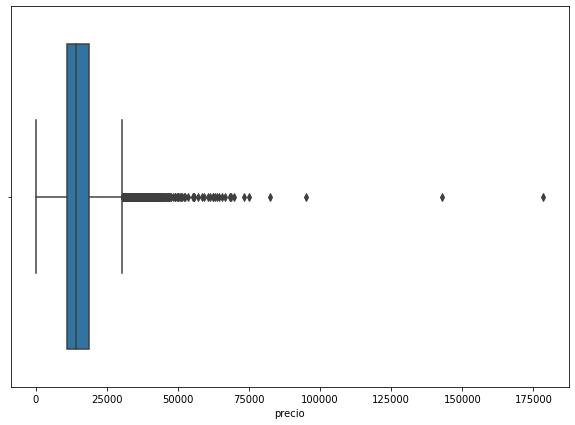

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig = plt.figure(figsize =(10, 7))
 
 
# Creating plot
bp = sns.boxplot(bmw['precio'])
 
# show plot
plt.show()

In [ ]:
bmw['precio'].mean()

15876.935956467141

In [ ]:
bmw['precio'].median()

14200.0

In [ ]:
from scipy.stats import kurtosis

In [ ]:
print(skew(bmw['precio'], axis=0, bias=True))

3.3408299690918106


In [ ]:
print(kurtosis(bmw['precio'], axis=0, bias=True))

32.88921593091463


In [ ]:
q75, q25 = np.percentile(bmw['precio'], [75 ,25])
iqr = q75 - q25

#display interquartile range 
iqr



7800.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f98a37c70>]],
      dtype=object)

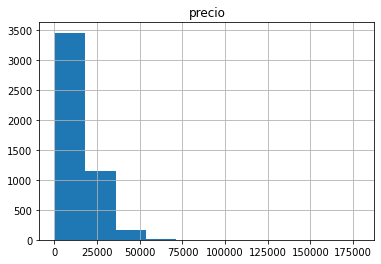

In [ ]:
bmw.hist("precio")

In [ ]:
bmw2=bmw.copy()

In [ ]:
bmw[bmw["precio"]<3000]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
25,BMW,318,196092.0,85.0,petrol,blue,convertible,True,False,False,False,False,False,False,False,1800.0,Sunday,1995,Tuesday,5
36,BMW,318,187294.0,105.0,petrol,red,convertible,True,False,False,False,False,True,True,False,2400.0,Saturday,2001,Friday,6
46,BMW,318,187104.0,105.0,petrol,red,convertible,True,False,False,False,False,True,True,False,2600.0,Saturday,2001,Wednesday,8
58,BMW,316,265751.0,85.0,petrol,silver,coupe,False,False,False,False,False,False,False,False,1000.0,Tuesday,2002,Monday,1
146,BMW,320,186950.0,120.0,petrol,grey,coupe,True,True,False,False,False,True,True,False,2700.0,Sunday,2001,Saturday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,BMW,X1,170742.0,135.0,diesel,blue,suv,False,False,False,False,False,False,True,False,800.0,Sunday,2014,Thursday,2
3939,BMW,X1,140752.0,105.0,diesel,black,suv,False,False,False,False,False,False,False,True,800.0,Saturday,2014,Friday,6
4356,BMW,X3,79685.0,190.0,diesel,black,suv,False,False,False,False,False,False,False,True,100.0,Saturday,2014,Tuesday,5
4806,BMW,218,118323.0,110.0,diesel,white,van,False,False,False,False,False,False,False,False,800.0,Monday,2014,Thursday,2


In [ ]:
bmw['precio']= np.where(bmw['precio']<3000,bmw["precio"].mean(),bmw['precio'])

In [ ]:
bmw2.drop(bmw2[bmw2["precio"]<3000].index,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f938b4c10>]],
      dtype=object)

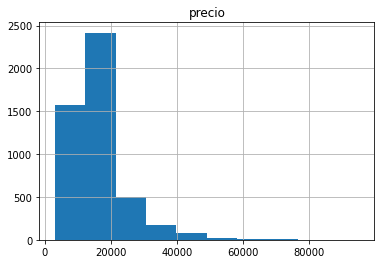

In [ ]:
bmw2.hist("precio")

In [ ]:
bmw2[bmw2["precio"]>80000]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES
90,BMW,i8,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,Friday,2016,Sunday,4
4146,BMW,X6 M,2970.0,423.0,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,Friday,2016,Sunday,4


In [ ]:
bmw3=bmw2.copy()

In [ ]:
bmw['precio']= np.where(bmw['precio']>100000,bmw["precio"].mean(),bmw['precio'])

In [ ]:
bmw3.drop(bmw3[bmw3["precio"]>100000].index,inplace=True)

In [ ]:
bmw3.hist("precio")

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110ac37910>]],
      dtype=object)

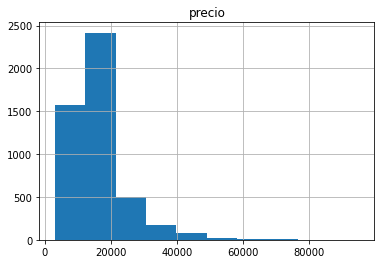

In [ ]:
bmw.hist("precio")

In [ ]:
bmw3["precio"].describe()

count     4666.000000
mean     16137.891127
std       8511.229337
min       3000.000000
25%      11100.000000
50%      14300.000000
75%      18900.000000
max      95200.000000
Name: precio, dtype: float64

Eliminamos los precios menores a 3000 y mayores a 100000.





In [ ]:
bmw["log_precio"]=np.log10(bmw["precio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110ac37130>]],
      dtype=object)

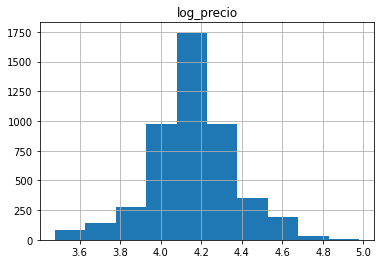

In [ ]:
bmw.hist("log_precio")

In [ ]:
bmw3["log_precio"]=np.log10(bmw3["precio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f95f0e670>]],
      dtype=object)

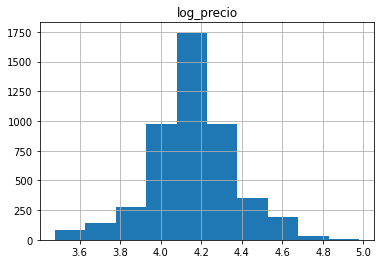

In [ ]:
bmw3.hist("log_precio")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f982b7ac0>]],
      dtype=object)

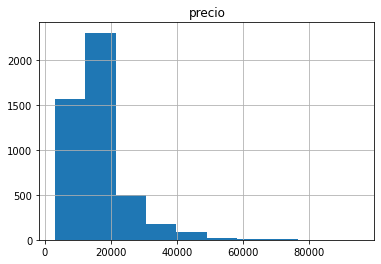

In [ ]:
bmw3.hist("precio")

Los valores de log_precio, presentan una distribucion mas normal.

In [ ]:
bmw3.loc[bmw3['log_precio'].idxmin()]['tipo_coche']

'estate'

In [ ]:
bmw3.loc[bmw3['log_precio'].idxmax()]['tipo_coche']

'coupe'

In [ ]:
bmw3.groupby('tipo_coche')['log_precio'].mean()

tipo_coche
convertible    4.178569
coupe          4.299844
estate         4.098829
hatchback      4.084148
sedan          4.176976
subcompact     3.962700
suv            4.274793
van            4.164699
Name: log_precio, dtype: float64

In [ ]:
bmw3['precio'].mean()

16148.042920486861

In [ ]:
bmw3['log_precio'].mean()

4.158504669525024

In [ ]:
bmw['precio'].mean()

15880.527638190955

In [ ]:
bmw3['potencia']= np.where(bmw3['potencia']<0,bmw3["potencia"].mean(),bmw3['potencia'])

In [ ]:
corr = bmw3.corr()

In [ ]:
corr = bmw3.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio,fecha_registro_AÑO,fecha_venta_MES,log_precio
km,1.000000,-0.046936,0.154414,-0.383575,-0.506158,-0.002329,-0.403386
potencia,-0.046936,1.000000,0.007728,0.674436,0.080075,-0.029265,0.607685
gps,0.154414,0.007728,1.000000,-0.019064,-0.071227,0.061117,-0.025184
precio,-0.383575,0.674436,-0.019064,1.000000,0.382561,0.000742,0.920819
fecha_registro_AÑO,-0.506158,0.080075,-0.071227,0.382561,1.000000,-0.053520,0.476813
fecha_venta_MES,-0.002329,-0.029265,0.061117,0.000742,-0.053520,1.000000,-0.014266
log_precio,-0.403386,0.607685,-0.025184,0.920819,0.476813,-0.014266,1.000000


In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778 entries, 0 to 4841
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4778 non-null   object 
 1   km                           4778 non-null   float64
 2   potencia                     4778 non-null   float64
 3   tipo_gasolina                4778 non-null   object 
 4   color                        4778 non-null   object 
 5   tipo_coche                   4778 non-null   object 
 6   volante_regulable            4778 non-null   object 
 7   aire_acondicionado           4778 non-null   object 
 8   camara_trasera               4778 non-null   object 
 9   asientos_traseros_plegables  4778 non-null   object 
 10  elevalunas_electrico         4778 non-null   object 
 11  bluetooth                    4778 non-null   object 
 12  gps                          4778 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
del(bmw['marca'])

KeyError: ignored

In [ ]:

del(bmw3["camara_trasera_False"])

KeyError: ignored

In [ ]:
bmw3

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_NOMBREDIA,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_MES,log_precio
0,BMW,118,140411.0,100.0,diesel,black,convertible,True,True,False,...,True,True,True,False,11300.0,Wednesday,2012,Monday,1,4.053078
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,False,True,True,True,69700.0,Friday,2016,Thursday,2,4.843233
2,BMW,320,183297.0,120.0,diesel,white,convertible,False,False,False,...,True,False,True,False,10200.0,Sunday,2012,Thursday,2,4.008600
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,True,True,True,True,25100.0,Tuesday,2014,Thursday,2,4.399674
4,BMW,425,97097.0,160.0,diesel,silver,convertible,True,True,False,...,False,True,True,True,33400.0,Monday,2014,Sunday,4,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,BMW,218 Gran Tourer,66770.0,110.0,diesel,blue,van,False,True,False,...,False,False,True,False,13400.0,Thursday,2015,Sunday,7,4.127105
4838,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,van,False,True,False,...,False,False,True,False,14600.0,Thursday,2015,Wednesday,8,4.164353
4839,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,van,False,True,False,...,False,False,True,True,17500.0,Monday,2015,Wednesday,8,4.243038
4840,BMW,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,...,False,False,True,True,17000.0,Thursday,2015,Saturday,9,4.230449


In [ ]:
le = LabelEncoder()

In [ ]:
bmw4=bmw3.copy()

In [ ]:
bmw4=pd.get_dummies(data=bmw4,columns = lista_categoricas)

In [ ]:
bmw4=pd.get_dummies(data=bmw4,columns = lista_boolean)

In [ ]:
bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 0 to 4841
Columns: 135 entries, marca to gps_True
dtypes: float64(4), int64(2), object(1), uint8(128)
memory usage: 1.0+ MB


In [ ]:
corr = bmw4.corr()
corr.style.background_gradient(cmap="coolwarm")

In [ ]:
corr

,km,potencia,precio,fecha_registro_AÑO,fecha_venta_MES,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,...,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_False,gps_True
km,1.000000,-0.046936,-0.383575,-0.506158,-0.002329,-0.403386,-0.022219,-0.062487,-0.108430,-0.014328,...,0.009611,0.004117,0.019021,-0.008278,0.012766,-0.007985,-0.017416,0.003127,-0.154414,0.154414
potencia,-0.046936,1.000000,0.674436,0.080075,-0.029265,0.607685,-0.010768,-0.082448,-0.318270,-0.114682,...,0.012313,-0.031509,-0.011351,-0.022919,0.007996,0.007141,0.027550,0.001939,-0.007728,0.007728
precio,-0.383575,0.674436,1.000000,0.382561,0.000742,0.920819,0.004882,-0.032811,-0.212778,-0.128920,...,0.019632,-0.018885,-0.017691,-0.008794,0.001204,0.002446,0.009794,0.020515,0.019064,-0.019064
fecha_registro_AÑO,-0.506158,0.080075,0.382561,1.000000,-0.053520,0.476813,0.008769,0.026594,0.022798,-0.063006,...,0.003899,-0.017945,0.009167,-0.008211,-0.015991,0.035476,0.024145,-0.037546,0.071227,-0.071227
fecha_venta_MES,-0.002329,-0.029265,0.000742,-0.053520,1.000000,-0.014266,0.000426,0.003392,0.027989,-0.039677,...,0.044343,0.186702,-0.385255,0.414761,0.102742,-0.633665,0.013278,0.497214,-0.061117,0.061117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fecha_venta_NOMBREDIA_Thursday,-0.007985,0.007141,0.002446,0.035476,-0.633665,0.017699,-0.008444,0.001636,-0.006257,0.011904,...,-0.006003,-0.220533,-0.122933,-0.128216,-0.340820,1.000000,-0.262903,-0.204390,0.042623,-0.042623
fecha_venta_NOMBREDIA_Tuesday,-0.017416,0.027550,0.009794,0.024145,0.013278,0.010526,0.032117,0.004682,-0.019324,-0.002626,...,-0.013651,-0.170303,-0.094934,-0.099013,-0.263193,-0.262903,1.000000,-0.157837,0.017076,-0.017076
fecha_venta_NOMBREDIA_Wednesday,0.003127,0.001939,0.020515,-0.037546,0.497214,0.010505,-0.005069,-0.007669,0.007896,-0.005593,...,0.027417,-0.132400,-0.073805,-0.076976,-0.204616,-0.204390,-0.157837,1.000000,-0.032633,0.032633
gps_False,-0.154414,-0.007728,0.019064,0.071227,-0.061117,0.025184,-0.003891,-0.015092,-0.031798,-0.007431,...,-0.000970,-0.041029,-0.002841,-0.019250,0.007831,0.042623,0.017076,-0.032633,1.000000,-1.000000


In [262]:
df = pd.DataFrame(data = bmw)

print("Data Frame")
print(df)
print()

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))


Top Absolute Correlations


KeyError: ignored

De las variables que tienen correlacion >0,9 elimino una de las variables.


In [ ]:
bmw5=bmw4.copy()

In [ ]:
del(bmw5["tipo_gasolina_petrol"])
del(bmw5["volante_regulable_False"])
del(bmw5["aire_acondicionado_False"])
del(bmw5["gps_False"])


KeyError: ignored

In [ ]:
del(bmw5["alerta_lim_velocidad_False"])
del(bmw5["bluetooth_False"])
del(bmw5["elevalunas_electrico_False"])
del(bmw5["asientos_traseros_plegables_False"])
del(bmw5["camara_trasera_False"])

In [ ]:
bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 0 to 4841
Columns: 125 entries, km to gps_True
dtypes: float64(4), int64(2), uint8(119)
memory usage: 945.2 KB


Voy a normalizar mis datos, dejarlos entre 0 y1 para poder comparar los datos. 

In [ ]:
minMaxScaler = MinMaxScaler()

In [ ]:
bmw6=bmw5.copy()

In [ ]:
del(bmw6["precio"])

In [ ]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4841
Columns: 125 entries, km to gps_True
dtypes: float64(3), int64(3), uint8(119)
memory usage: 789.6 KB


In [ ]:
bmw6["log_km"]=np.log10(bmw6["km"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f95cbf670>]],
      dtype=object)

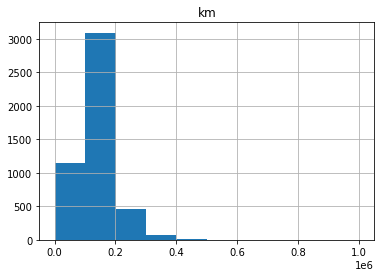

In [ ]:
bmw6.hist("km")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f94deb340>]],
      dtype=object)

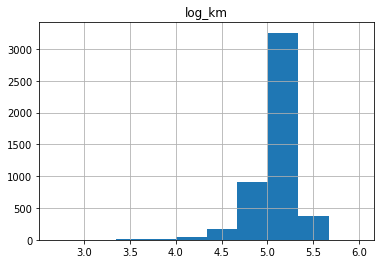

In [ ]:
bmw6.hist("log_km")

In [ ]:
bmw6["log_potencia"]=np.log10(bmw6["potencia"])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f95ef55e0>]],
      dtype=object)

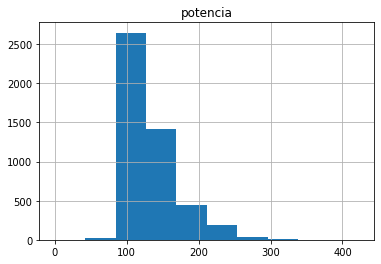

In [ ]:
bmw6.hist("potencia")

In [ ]:
bmw6.loc[bmw3['potencia'].idxmin()]['log_precio']

4.068185861746161

Dejos las columnas de log_potencia y log_km y elimino potencia y km

In [ ]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 0 to 4841
Columns: 126 entries, km to log_potencia
dtypes: float64(5), int64(2), uint8(119)
memory usage: 982.6 KB


In [ ]:
del(bmw6["potencia"])
del(bmw6["km"])

In [ ]:
from google.colab import drive
drive.mount('drive',force_remount=True)


bmw.to_csv('hola.csv')
!cp hola.csv "/content/drive/MyDrive"

Mounted at drive


In [ ]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4841
Columns: 125 entries, fecha_registro_MES to log_potencia
dtypes: float64(3), int64(3), uint8(119)
memory usage: 805.8 KB


In [ ]:
bmw7=bmw6.copy()

In [ ]:
bmw7["log_km"]=minMaxScaler.fit_transform(bmw6["log_km"].values.reshape(-1,1))

In [ ]:
bmw7["potencia"]=minMaxScaler.fit_transform(bmw6["potencia"].values.reshape(-1,1))

In [ ]:
bmw7["log_precio"]=minMaxScaler.fit_transform(bmw6["log_precio"].values.reshape(-1,1))

In [ ]:
bmw7["fecha_registro_MES"]=minMaxScaler.fit_transform(bmw6["fecha_registro_MES"].values.reshape(-1,1))

KeyError: ignored

In [ ]:
bmw7["fecha_registro_AÑO"]=minMaxScaler.fit_transform(bmw6["fecha_registro_AÑO"].values.reshape(-1,1))

In [ ]:
bmw7["fecha_venta_MES"]=minMaxScaler.fit_transform(bmw6["fecha_venta_MES"].values.reshape(-1,1))

In [ ]:
bmw7.head()

,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,...,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True,log_km,log_potencia
0,0.090909,0.761905,0.000,0.383584,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0.821133,0.280192
2,0.272727,0.761905,0.125,0.353962,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.859617,0.423418
3,0.545455,0.857143,0.125,0.614414,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.807810,0.515944
4,1.000000,0.857143,0.375,0.697046,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.767872,0.649412
5,0.363636,0.714286,0.125,0.503408,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.832918,0.917232


In [ ]:
bmw7.reset_index(inplace=True, drop=True)

In [ ]:
bmw7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Columns: 125 entries, fecha_registro_MES to log_potencia
dtypes: float64(6), uint8(119)
memory usage: 753.6 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= bmw7.drop("log_precio",axis=1)

In [ ]:
del(bmw7['log_km'])

In [ ]:
x.head()

,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,...,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True,log_km,log_potencia
0,0.090909,0.761905,0.000,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0.821133,0.280192
1,0.272727,0.761905,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.859617,0.423418
2,0.545455,0.857143,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.807810,0.515944
3,1.000000,0.857143,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.767872,0.649412
4,0.363636,0.714286,0.125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.832918,0.917232


In [ ]:
y= bmw7["log_precio"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=12)

In [ ]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 3234
Test data instances: 1386


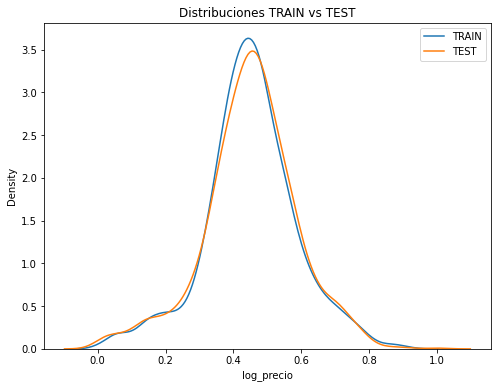

In [ ]:
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg= LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test

,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,...,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True,log_km,log_potencia
4549,0.181818,0.761905,1.000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.820087,0.280192
2027,0.090909,0.857143,0.500,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.847972,0.152523
1633,1.000000,0.666667,1.000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.893391,0.515944
221,0.727273,0.476190,0.000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.939949,0.197424
3020,0.272727,0.809524,0.500,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.842928,0.280192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,0.181818,0.809524,0.250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0.853738,0.152523
903,0.181818,0.428571,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.971585,0.486297
341,1.000000,0.666667,0.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.847319,0.280192
1488,0.454545,0.809524,0.750,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.739291,0.152523


In [ ]:
y_test

4549    0.424120
2027    0.386132
1633    0.386132
221     0.000000
3020    0.428535
          ...   
1834    0.388658
903     0.044586
341     0.283692
1488    0.403368
3057    0.388658
Name: log_precio, Length: 1386, dtype: float64

In [ ]:
y_pred= lin_reg.predict(x_test)

In [ ]:
y_pred

array([0.34204102, 0.36694336, 0.37646484, ..., 0.28271484, 0.36376953,
       0.39892578])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

1.2211992111909358e+19

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

147026829.19905388

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import cross_val_predict

print('R2:',r2_score(y,cross_val_predict(RandomForestRegressor(),x,y,cv=10)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,cross_val_predict(method,x,y,cv=10))))

NameError: ignored

In [ ]:
r2_score(y_train,y_pred)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
target = 'log_precio'

In [ ]:
a = [i for i in bmw7.columns if i != target]

In [ ]:
x_train_std = pd.DataFrame(x_train_std, columns = a)
x_test_std = pd.DataFrame(x_test_std, columns = a)

ValueError: ignored

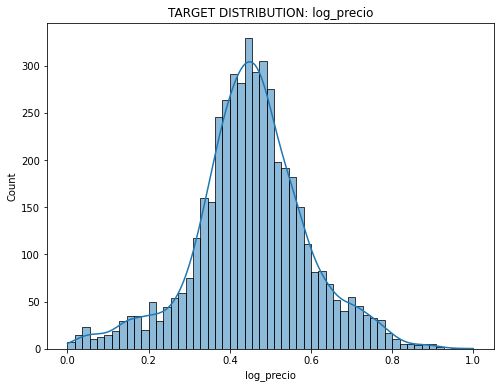

In [ ]:
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge() 

In [ ]:
model.fit(x_train_std, y_train) 

Ridge()

In [ ]:
model.score(x_test_std,y_test)

0.8581449311836936

In [ ]:
y_train_pred = model.predict(x_train_std)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(x_test_std)                          # predicciones del modelo en los datos de TEST

In [ ]:
error = y_test_pred - y_test.values

In [ ]:
mae = np.mean(np.abs(error))
mape = np.mean(error/y_test)
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

In [ ]:
print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))

MAE: 0.0344
MAPE: inf%
MSE: 0.0028
RMSE: 0.0526


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))
print('R2-score',round(r2,4))

MAE: 0.0344
MAPE: 64926612153345.328%
MSE: 0.0028
RMSE: 0.0526
R2-score 0.8581


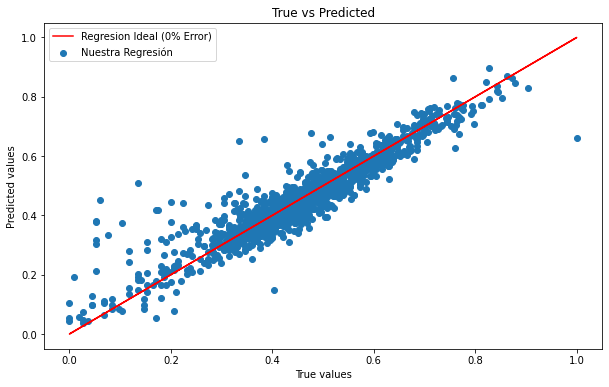

In [ ]:
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

VOY A PROBAR EL MODELO CON PRECIO.

In [ ]:
bmw5

,km,potencia,precio,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,...,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True
0,140411.0,100.0,11300.0,2,2012,1,4.053078,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,13929.0,317.0,69700.0,4,2016,2,4.843233,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,183297.0,120.0,10200.0,4,2012,2,4.008600,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,128035.0,135.0,25100.0,7,2014,2,4.399674,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,97097.0,160.0,33400.0,12,2014,4,4.523746,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,13400.0,10,2015,7,4.127105,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4838,39743.0,110.0,14600.0,10,2015,8,4.164353,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4839,49832.0,100.0,17500.0,6,2015,8,4.243038,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4840,19633.0,110.0,17000.0,10,2015,9,4.230449,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
bmw_1 = bmw5.copy()

In [ ]:
bmw5.head()

,km,potencia,precio,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,...,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True
0,140411.0,100.0,11300.0,2,2012,1,4.053078,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,13929.0,317.0,69700.0,4,2016,2,4.843233,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,183297.0,120.0,10200.0,4,2012,2,4.008600,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,128035.0,135.0,25100.0,7,2014,2,4.399674,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,97097.0,160.0,33400.0,12,2014,4,4.523746,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
bmw_1["km"]=minMaxScaler.fit_transform(bmw5["km"].values.reshape(-1,1))

In [ ]:
bmw_1["potencia"]=minMaxScaler.fit_transform(bmw5["potencia"].values.reshape(-1,1))

In [ ]:
bmw_1["fecha_registro_MES"]=minMaxScaler.fit_transform(bmw5["fecha_registro_MES"].values.reshape(-1,1))

In [ ]:
bmw_1["fecha_registro_AÑO"]=minMaxScaler.fit_transform(bmw5["fecha_registro_AÑO"].values.reshape(-1,1))

In [ ]:
bmw_1["fecha_venta_MES"]=minMaxScaler.fit_transform(bmw5["fecha_venta_MES"].values.reshape(-1,1))

In [ ]:
bmw_1.reset_index(inplace=True, drop=True)

In [ ]:
bmw_1.head()

,km,potencia,precio,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,...,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True
0,0.289039,0.084986,11300.0,0.090909,0.761905,0.000,4.053078,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0.027787,0.699717,69700.0,0.272727,0.952381,0.125,4.843233,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.377621,0.141643,10200.0,0.272727,0.761905,0.125,4.008600,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.263476,0.184136,25100.0,0.545455,0.857143,0.125,4.399674,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.199573,0.254958,33400.0,1.000000,0.857143,0.375,4.523746,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
del(bmw_1["log_precio"])

In [ ]:
x= bmw_1.drop("precio",axis=1)

In [ ]:
y= bmw_1["precio"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [ ]:
len(x_train)


3300

In [ ]:
len(y_train)

3300

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg= LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test

,km,potencia,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,...,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday,fecha_venta_NOMBREDIA_Friday,fecha_venta_NOMBREDIA_Monday,fecha_venta_NOMBREDIA_Saturday,fecha_venta_NOMBREDIA_Sunday,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,gps_True
2914,0.465868,0.141643,0.272727,0.714286,0.375,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1378,0.489291,0.226629,0.636364,0.714286,0.625,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2179,0.365263,0.042493,0.818182,0.761905,0.750,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1368,0.490743,0.056657,0.636364,0.476190,0.625,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1918,0.319355,0.042493,0.818182,0.809524,0.250,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,0.161375,0.141643,0.090909,0.809524,0.250,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1817,0.329308,0.099150,0.181818,0.857143,0.250,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3364,0.453355,0.084986,0.818182,0.809524,0.875,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1027,0.408891,0.084986,0.181818,0.809524,0.500,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
y_test

2914    10200.0
1378    11300.0
2179     8300.0
1368     4000.0
1918     9000.0
         ...   
2730    14000.0
1817    15600.0
3364    17400.0
1027     9400.0
1115    19000.0
Name: precio, Length: 1400, dtype: float64

In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred= lin_reg.predict(x_test)

In [ ]:
y_test

2914    10200.0
1378    11300.0
2179     8300.0
1368     4000.0
1918     9000.0
         ...   
2730    14000.0
1817    15600.0
3364    17400.0
1027     9400.0
1115    19000.0
Name: precio, Length: 1400, dtype: float64

In [ ]:
y_pred

array([10801.375, 11087.375,  6857.375, ..., 16190.375,  8454.375,
       18578.375])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

2.642107134495074e+28

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

4855862265561.39

In [ ]:
pd.to_pickle(bmw,"/content/drive/MyDrive/nuclio/Clases_Joseph_Gallart/bmw2.csv")